In [4]:
from line_widths import get_data, exclude_outliers
import numpy as np

out_path = '/Users/cly/Google Drive/Zcalbase_gal/dataset/'

data0, mass_data, logM = get_data(out_path)

OIII = 1.33*data0['OIIIR_FLUX_MOD'].data
OII  = data0['OII_FLUX_MOD'].data
HB   = data0['HB_FLUX_MOD'].data

SNR2_ini = data0['OII_SNR'].data
SNR3_ini = data0['OIIIR_SNR'].data
SNRH_ini = data0['HB_SNR'].data

exclude_flag = exclude_outliers(data0['OBJNO'])

det3 = np.where((SNR2_ini >= 3) & (SNR3_ini >= 3) & (SNRH_ini >= 3) &
                (OII > 0) & (OIII > 0) & (HB > 0) & (exclude_flag == 0))[0]
print('# size det3 : ', len(det3))

lR23 = np.log10((OII + OIII)/HB)
lO32 = np.log10(OIII/OII)

INFO: Reading : /Users/cly/Google Drive/Zcalbase_gal/dataset/DEEP2_all_line_fit.fits [line_widths]
(0, 2368)
(1, 2688)
(2, 3542)
(3, 2613)
(4, 966)
('# size det3 : ', 2809)


/Users/cly/apps/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log10
/Users/cly/apps/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in log10


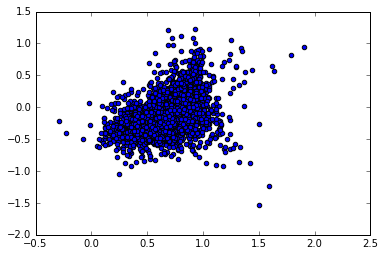

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(lR23[det3], lO32[det3])

In [6]:
high_R23 = np.where(lR23[det3] >= 1.25)[0]

print ">> log(R23)"
print lR23[det3][high_R23]
print ">> OIIIR sigma"
print data0['OIIIR_SIGMA'][det3][high_R23].data

data0[det3][high_R23]

>> log(R23)
[1.49952857 1.33243902 1.34432127 1.78851447 1.44097672 1.26757774
 1.36516851 1.36984914 1.59024859 1.28989502 1.2503806  1.37719803
 1.27018436 1.62084177 1.27164058 1.32426283 1.29485243 1.2942966
 1.90399447 1.63799088 1.32162236 1.34780989 1.49800137 1.41699142]
>> OIIIR sigma
[1.6167055 1.685147  7.532897  3.4359581 3.054196  1.9749264 8.352869
 5.039525  2.4973245 1.4781502 7.5888042 5.3193746 2.3116672 3.8842413
 7.3240767 2.2135794 4.3740373 4.6884503 6.557996  6.208082  6.8786683
 4.972161  2.7714353 1.2192475]


OBJNO,SLIT,LINE,ZSPEC,OII_LAMBDA,OII_ZSPEC,OII_PEAK,OII_SIGMA,OII_Y0,OII_FLUX_MOD,OII_FLUX_DATA,OII_NOISE,OII_SNR,OIIB_LAMBDA,OIIB_ZSPEC,OIIB_PEAK,OIIB_SIGMA,OIIB_Y0,OIIB_FLUX_MOD,OIIB_FLUX_DATA,OIIB_NOISE,OIIB_SNR,OIIR_LAMBDA,OIIR_ZSPEC,OIIR_PEAK,OIIR_SIGMA,OIIR_Y0,OIIR_FLUX_MOD,OIIR_FLUX_DATA,OIIR_NOISE,OIIR_SNR,NEIIIA_LAMBDA,NEIIIA_ZSPEC,NEIIIA_PEAK,NEIIIA_SIGMA,NEIIIA_Y0,NEIIIA_FLUX_MOD,NEIIIA_FLUX_DATA,NEIIIA_NOISE,NEIIIA_SNR,HZETA_LAMBDA,HZETA_ZSPEC,HZETA_PEAK,HZETA_SIGMA,HZETA_Y0,HZETA_FLUX_MOD,HZETA_FLUX_DATA,HZETA_NOISE,HZETA_SNR,HE_LAMBDA,HE_ZSPEC,HE_PEAK,HE_SIGMA,HE_Y0,HE_FLUX_MOD,HE_FLUX_DATA,HE_NOISE,HE_SNR,HD_LAMBDA,HD_ZSPEC,HD_PEAK,HD_SIGMA,HD_Y0,HD_FLUX_MOD,HD_FLUX_DATA,HD_NOISE,HD_SNR,HG_LAMBDA,HG_ZSPEC,HG_PEAK,HG_SIGMA,HG_Y0,HG_FLUX_MOD,HG_FLUX_DATA,HG_NOISE,HG_SNR,OIIIA_LAMBDA,OIIIA_ZSPEC,OIIIA_PEAK,OIIIA_SIGMA,OIIIA_Y0,OIIIA_FLUX_MOD,OIIIA_FLUX_DATA,OIIIA_NOISE,OIIIA_SNR,HB_LAMBDA,HB_ZSPEC,HB_PEAK,HB_SIGMA,HB_Y0,HB_FLUX_MOD,HB_FLUX_DATA,HB_NOISE,HB_SNR,OIIIB_LAMBDA,OIIIB_ZSPEC,OIIIB_PEAK,OIIIB_SIGMA,OIIIB_Y0,OIIIB_FLUX_MOD,OIIIB_FLUX_DATA,OIIIB_NOISE,OIIIB_SNR,OIIIR_LAMBDA,OIIIR_ZSPEC,OIIIR_PEAK,OIIIR_SIGMA,OIIIR_Y0,OIIIR_FLUX_MOD,OIIIR_FLUX_DATA,OIIIR_NOISE,OIIIR_SNR,NIIA_LAMBDA,NIIA_ZSPEC,NIIA_PEAK,NIIA_SIGMA,NIIA_Y0,NIIA_FLUX_MOD,NIIA_FLUX_DATA,NIIA_NOISE,NIIA_SNR,HA_LAMBDA,HA_ZSPEC,HA_PEAK,HA_SIGMA,HA_Y0,HA_FLUX_MOD,HA_FLUX_DATA,HA_NOISE,HA_SNR,NIIB_LAMBDA,NIIB_ZSPEC,NIIB_PEAK,NIIB_SIGMA,NIIB_Y0,NIIB_FLUX_MOD,NIIB_FLUX_DATA,NIIB_NOISE,NIIB_SNR,SIIA_LAMBDA,SIIA_ZSPEC,SIIA_PEAK,SIIA_SIGMA,SIIA_Y0,SIIA_FLUX_MOD,SIIA_FLUX_DATA,SIIA_NOISE,SIIA_SNR,SIIB_LAMBDA,SIIB_ZSPEC,SIIB_PEAK,SIIB_SIGMA,SIIB_Y0,SIIB_FLUX_MOD,SIIB_FLUX_DATA,SIIB_NOISE,SIIB_SNR,BALMER1,BALMER2,HZETA_EW,HD_EW,HG_EW,HB_EW,HA_EW,LMIN,LMAX,LMIN0,LMAX0
int32,str8,int16,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11028476,1140.051,113,0.8084,0.0,0.0,0.0,0.0,0.0,4.930479788991572e-16,4.1674023651889537e-16,1.9819801687780954e-17,6.4361053,6737.387,0.8081315,1.2098453749764442e-17,9.880744,-1.6054856976091393e-18,2.9964666552749986e-16,2.532711224523055e-16,1.9739181073828064e-17,3.3328524,6742.373,0.8081352,3.275565163822927e-17,2.355501,-1.6054856976091393e-18,1.93401331220514e-16,1.634691050399635e-16,1.9900423561604348e-17,4.370047,6992.331,0.80739236,1.244257206289999e-17,2.1593313,-7.62782770983184e-19,6.73471750126281e-17,6.473881358845856e-17,1.5219069933314243e-17,2.3635857,7033.2764,0.8084818,1.3172530534128694e-17,0.5,1.2108242567193106e-18,1.6509318742641264e-17,1.0683238046096865e-17,1.407248205406819e-17,0.8766002,7178.476,0.80814844,-4.977147641690953e-18,4.718641,4.3628716483074935e-18,-5.886909737275908e-17,-4.728084005636303e-17,1.1439533472231017e-17,-1.5535412,7415.9106,0.8079

In [15]:
'''
Trying to troublshoot why some spectra are not flagged as high dispersion
when it is seen to have high dispersion in plots
'''
import astropy.units as u
import astropy.constants as const
from chun_codes import intersect

c_value = const.c.to(u.km/u.s).value

x_temp = data0['OIIIR_SIGMA'].data
good = np.where((x_temp < 90) & (x_temp > -90))[0]
        
x_temp = x_temp / 5006.84 * c_value

det3_good = intersect(det3, good)

high_disp = np.where(x_temp[det3_good] >= 510)[0]
print(len(high_disp))
print(x_temp[det3_good[high_disp]])

5
[543.1737  541.1669  519.78284 531.2585  578.0466 ]


In [16]:
data0[det3_good[high_disp]]

OBJNO,SLIT,LINE,ZSPEC,OII_LAMBDA,OII_ZSPEC,OII_PEAK,OII_SIGMA,OII_Y0,OII_FLUX_MOD,OII_FLUX_DATA,OII_NOISE,OII_SNR,OIIB_LAMBDA,OIIB_ZSPEC,OIIB_PEAK,OIIB_SIGMA,OIIB_Y0,OIIB_FLUX_MOD,OIIB_FLUX_DATA,OIIB_NOISE,OIIB_SNR,OIIR_LAMBDA,OIIR_ZSPEC,OIIR_PEAK,OIIR_SIGMA,OIIR_Y0,OIIR_FLUX_MOD,OIIR_FLUX_DATA,OIIR_NOISE,OIIR_SNR,NEIIIA_LAMBDA,NEIIIA_ZSPEC,NEIIIA_PEAK,NEIIIA_SIGMA,NEIIIA_Y0,NEIIIA_FLUX_MOD,NEIIIA_FLUX_DATA,NEIIIA_NOISE,NEIIIA_SNR,HZETA_LAMBDA,HZETA_ZSPEC,HZETA_PEAK,HZETA_SIGMA,HZETA_Y0,HZETA_FLUX_MOD,HZETA_FLUX_DATA,HZETA_NOISE,HZETA_SNR,HE_LAMBDA,HE_ZSPEC,HE_PEAK,HE_SIGMA,HE_Y0,HE_FLUX_MOD,HE_FLUX_DATA,HE_NOISE,HE_SNR,HD_LAMBDA,HD_ZSPEC,HD_PEAK,HD_SIGMA,HD_Y0,HD_FLUX_MOD,HD_FLUX_DATA,HD_NOISE,HD_SNR,HG_LAMBDA,HG_ZSPEC,HG_PEAK,HG_SIGMA,HG_Y0,HG_FLUX_MOD,HG_FLUX_DATA,HG_NOISE,HG_SNR,OIIIA_LAMBDA,OIIIA_ZSPEC,OIIIA_PEAK,OIIIA_SIGMA,OIIIA_Y0,OIIIA_FLUX_MOD,OIIIA_FLUX_DATA,OIIIA_NOISE,OIIIA_SNR,HB_LAMBDA,HB_ZSPEC,HB_PEAK,HB_SIGMA,HB_Y0,HB_FLUX_MOD,HB_FLUX_DATA,HB_NOISE,HB_SNR,OIIIB_LAMBDA,OIIIB_ZSPEC,OIIIB_PEAK,OIIIB_SIGMA,OIIIB_Y0,OIIIB_FLUX_MOD,OIIIB_FLUX_DATA,OIIIB_NOISE,OIIIB_SNR,OIIIR_LAMBDA,OIIIR_ZSPEC,OIIIR_PEAK,OIIIR_SIGMA,OIIIR_Y0,OIIIR_FLUX_MOD,OIIIR_FLUX_DATA,OIIIR_NOISE,OIIIR_SNR,NIIA_LAMBDA,NIIA_ZSPEC,NIIA_PEAK,NIIA_SIGMA,NIIA_Y0,NIIA_FLUX_MOD,NIIA_FLUX_DATA,NIIA_NOISE,NIIA_SNR,HA_LAMBDA,HA_ZSPEC,HA_PEAK,HA_SIGMA,HA_Y0,HA_FLUX_MOD,HA_FLUX_DATA,HA_NOISE,HA_SNR,NIIB_LAMBDA,NIIB_ZSPEC,NIIB_PEAK,NIIB_SIGMA,NIIB_Y0,NIIB_FLUX_MOD,NIIB_FLUX_DATA,NIIB_NOISE,NIIB_SNR,SIIA_LAMBDA,SIIA_ZSPEC,SIIA_PEAK,SIIA_SIGMA,SIIA_Y0,SIIA_FLUX_MOD,SIIA_FLUX_DATA,SIIA_NOISE,SIIA_SNR,SIIB_LAMBDA,SIIB_ZSPEC,SIIB_PEAK,SIIB_SIGMA,SIIB_Y0,SIIB_FLUX_MOD,SIIB_FLUX_DATA,SIIB_NOISE,SIIB_SNR,BALMER1,BALMER2,HZETA_EW,HD_EW,HG_EW,HB_EW,HA_EW,LMIN,LMAX,LMIN0,LMAX0
int32,str8,int16,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float32,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11032071,1156.070,122,0.7917,0.0,0.0,0.0,0.0,0.0,5.1996202728168896e-17,5.039986325994976e-17,1.1701987640986611e-18,17.94158,6675.1606,0.7914316,1.0396735511707651e-18,2.6707125,7.931325891896167e-19,6.960077322702539e-18,6.7463951510414595e-18,1.1679936750677462e-18,2.885839,6680.1006,0.79143524,5.916436011884421e-18,3.0367632,7.931325891896167e-19,4.5036126745048677e-17,4.3653467196900303e-17,1.1724038301292432e-18,17.445782,99.999,-0.974152,99.9990005493164,99.999,7.781217301994527e-19,99.9990005493164,99.9990005493164,1.1184466992187487e-18,0.0,6971.85,0.7926872,-5.760359232374391e-19,5.737405,8.491964700305651e-19,-8.284284335700952e-18,-8.943124399793924e-18,1.1049814673489143e-18,-2.758868,7113.5737,0.79180056,6.422800587291906e-19,3.6290283,7.401820456000159e-19,5.842580837395337e-18,5.774525806205231e-18,1.0385174682635132e-18,2.3832066,99.999,-0.97562027,99.9990005493164,99.

Some of these sources have very broad OIIIR but not other lines.